#**Feedback Prize English Language Learning**
***
The goal is to assess the language proficiency of 8th-12th grade English Language Learners (ELLs). Utilizing a dataset of essays written by ELLs will help to develop proficiency models that better supports all students.

This will help ELLs receive more accurate feedback on their language development and expedite the grading cycle for teachers. These outcomes could enable ELLs to receive more appropriate learning tasks that will help them improve their English language proficiency.

The dataset presented here (the ELLIPSE corpus) comprises argumentative essays written by 8th-12th grade English Language Learners (ELLs). The essays have been scored according to six analytic measures: **cohesion, syntax, vocabulary, phraseology, grammar, and conventions.**

Each measure represents a component of proficiency in essay writing, with greater scores corresponding to greater proficiency in that measure. The scores range from **1.0 to 5.0** in increments of 0.5. The task is to predict the score of each of the six measures for the essays given in the test set.

###Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Getting data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/feedback-prize-english-language-learning/train.csv')
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [ ]:
df.isna().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

Observations
* There are no missing values.


In [ ]:
for i in df.drop(['text_id','full_text'],axis=1).columns:
  print('Distribution of ',i)
  print(df[i].value_counts().sort_values())
  print('-'*50)

Distribution of  cohesion
1.0      10
5.0      26
1.5      27
4.5     125
2.0     315
4.0     534
2.5     790
3.5     988
3.0    1096
Name: cohesion, dtype: int64
--------------------------------------------------
Distribution of  syntax
1.0      11
5.0      17
1.5      29
4.5     100
4.0     388
2.0     410
2.5     839
3.5     867
3.0    1250
Name: syntax, dtype: int64
--------------------------------------------------
Distribution of  vocabulary
1.0       2
1.5      14
5.0      41
4.5     115
2.0     124
2.5     528
4.0     577
3.5    1007
3.0    1503
Name: vocabulary, dtype: int64
--------------------------------------------------
Distribution of  phraseology
1.0      10
1.5      11
5.0      25
4.5     108
2.0     350
4.0     553
2.5     772
3.5     929
3.0    1153
Name: phraseology, dtype: int64
--------------------------------------------------
Distribution of  grammar
1.0      8
1.5     20
5.0     29
4.5    134
4.0    447
2.0    544
2.5    855
3.5    880
3.0    994
Name: grammar,

Observations
* Most of the stundents scoring **`3.0`** in every analytics measures.
* **`2.0-4.0`** is the range of the scores in which majority of the student falls.
* A few students scored the both of the end points score. 

###Preprocessing and visualize data

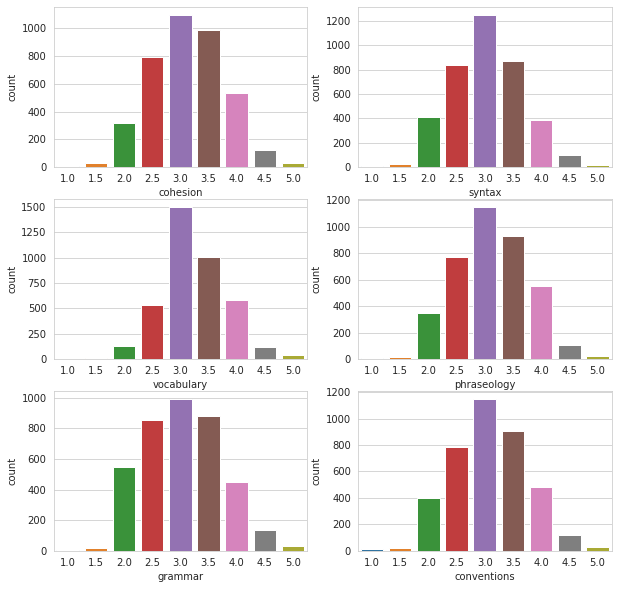

In [ ]:
sns.set_style('whitegrid')
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
sns.countplot(data=df,x='cohesion',ax=ax1)
sns.countplot(data=df,x='syntax',ax=ax2)
sns.countplot(data=df,x='vocabulary',ax=ax3)
sns.countplot(data=df,x='phraseology',ax=ax4)
sns.countplot(data=df,x='grammar',ax=ax5)
sns.countplot(data=df,x='conventions',ax=ax6)
plt.savefig('count1.png')

Observations
* Scores of the students are completely normally distributed
* Ideal range is 2.0-4.0

In [ ]:
## total words
total_words = []
for i in df['full_text']:
  i = i.split()
  total_words.append(len(i))

df['total_words'] = total_words

In [ ]:
df['total_words'].mean()

430.4929685502429

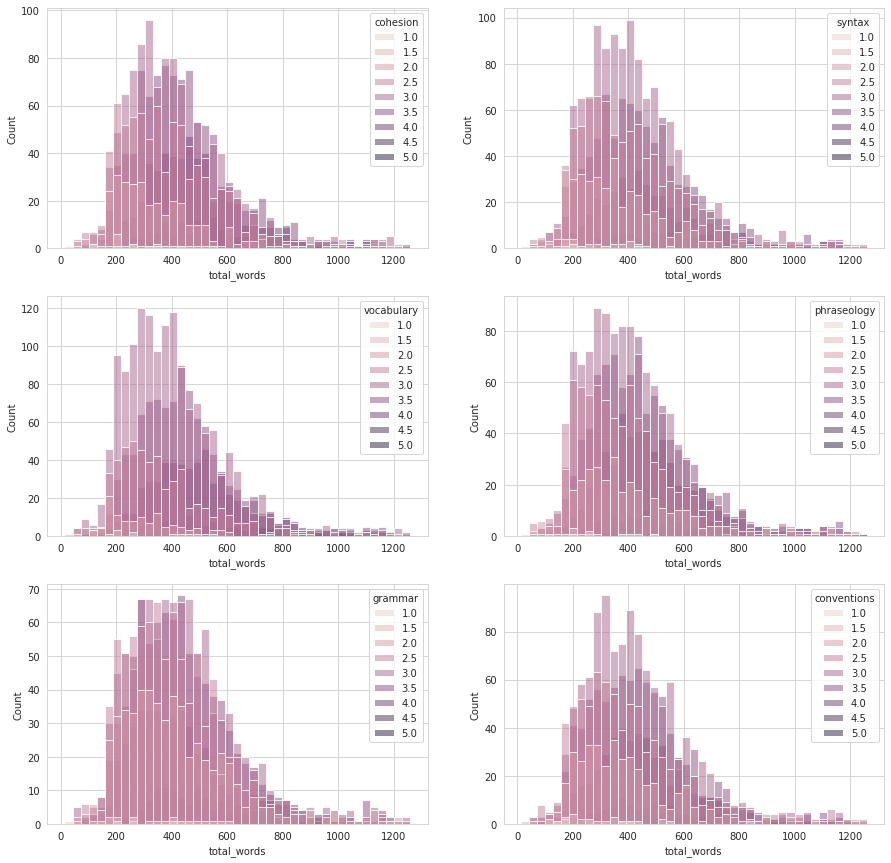

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(15,15))
sns.histplot(data=df,hue='cohesion',ax=ax1,x='total_words')
sns.histplot(data=df,hue='syntax',ax=ax2,x='total_words')
sns.histplot(data=df,hue='vocabulary',ax=ax3,x='total_words')
sns.histplot(data=df,hue='phraseology',ax=ax4,x='total_words')
sns.histplot(data=df,hue='grammar',ax=ax5,x='total_words')
sns.histplot(data=df,hue='conventions',ax=ax6,x='total_words')

In [ ]:
x = df['full_text']
y = df.drop(['full_text','text_id','total_words'],axis=1)

In [ ]:
for i in y.columns:
  print('Mean of',i,'is',y[i].mean())

Mean of cohesion is 3.127077473791869
Mean of syntax is 3.0282536435694194
Mean of vocabulary is 3.2357453336742523
Mean of phraseology is 3.1168499105088214
Mean of grammar is 3.032856047046791
Mean of conventions is 3.081053439018154


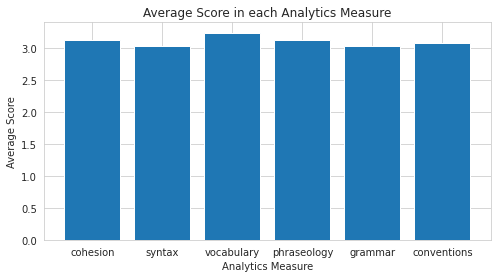

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
avg_score = [df['cohesion'].mean(),df['syntax'].mean(),df['vocabulary'].mean(),df['phraseology'].mean(),df['grammar'].mean(),df['conventions'].mean()]
bar = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
plt.bar(bar,avg_score)
plt.title('Average Score in each Analytics Measure')
plt.xlabel('Analytics Measure')
plt.ylabel('Average Score')

plt.show()

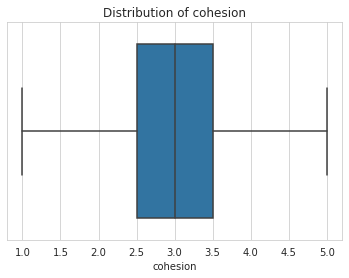

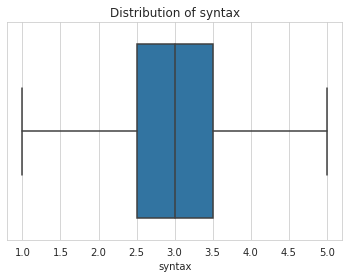

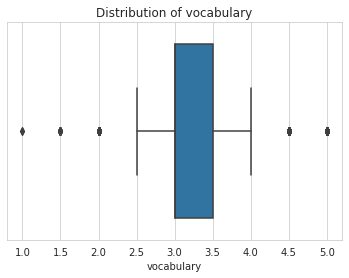

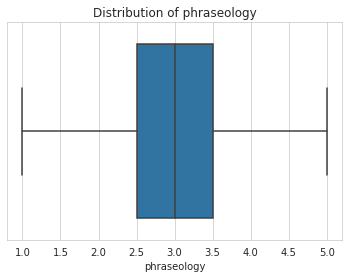

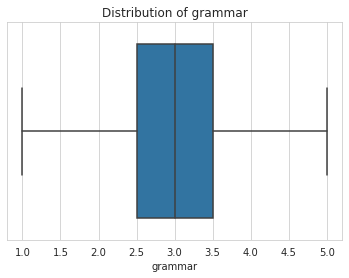

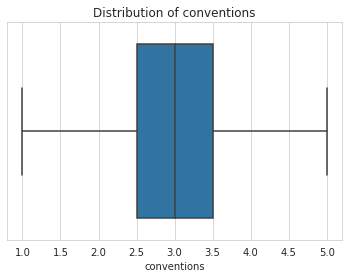

In [ ]:
for i in y.columns:
  sns.boxplot(x=df[i])
  plt.title('Distribution of '+i)
  plt.show()

Observations
*  `cohesion`,`syntax`,`phraseology`,`grammar`,`conventions` doesn't have outliers
* There are some outliers in `vocabulary`needs to check the data

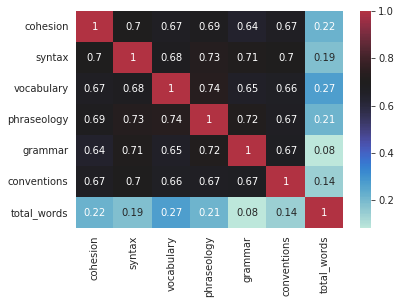

In [ ]:
sns.heatmap(df.corr(),annot=True,center=0.7)

###Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

###Converting text into number

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

a = []
for i in x_train:
  i = i.split()
  for j in i:
    a.append(j)
## length of vocab
len(set(a))

36525

In [ ]:
# getting the size of the output token
np.percentile(total_words,95)

788.0

In [ ]:
text_vector = TextVectorization(max_tokens=37000,output_sequence_length=800)
text_vector.adapt(x_train)

In [ ]:
## creating embedding
from tensorflow.keras import layers

embed = layers.Embedding(input_dim=37000,output_dim=128,input_length=800,mask_zero=True)

###Running Model Experiments


*   Model0:Feed Fordward Neural Net(Dense Model)
*   Model1:LSTM(RNN)
*   Model2:1D CNN
*   Model3:Tensorflow Hub Pre-Trained(Feature Extractor)
*   Model4:Tensorflow Hub Pre-Trained(Fine Tuning)



####Model0:Feed Fordward Neural Net(Dense Model)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vector(inputs)
x = embed(x)

x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.25)(x)

output_1 = layers.Dense(1,activation='relu',name='o1')(x)
output_2 = layers.Dense(1,activation='relu',name='o2')(x)
output_3 = layers.Dense(1,activation='relu',name='o3')(x)
output_4 = layers.Dense(1,activation='relu',name='o4')(x)
output_5 = layers.Dense(1,activation='relu',name='o5')(x)
output_6 = layers.Dense(1,activation='relu',name='o6')(x)

model_0 = tf.keras.Model(inputs=inputs,outputs=[output_1,output_2,output_3,output_4,output_5,output_6])
model_0.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 800)         0           ['input_1[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding (Embedding)          (None, 800, 128)     4736000     ['text_vectorization[0][0]']     
                                                                                                  
 dense (Dense)                  (None, 800, 256)     33024       ['embedding[0][0]']          

In [ ]:
## compiling the model
model_0.compile(loss={'o1':tf.keras.losses.MeanSquaredError(),
                      'o2':tf.keras.losses.MeanSquaredError(),
                      'o3':tf.keras.losses.MeanSquaredError(),
                      'o4':tf.keras.losses.MeanSquaredError(),
                      'o5':tf.keras.losses.MeanSquaredError(),
                      'o6':tf.keras.losses.MeanSquaredError()},
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
## fitting the model
model_0.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=[x_test,y_test])

Epoch 1/10
98/98 [==============================] - 6s 24ms/step - loss: 23.6148 - o1_loss: 3.1724 - o2_loss: 2.9262 - o3_loss: 6.1287 - o4_loss: 2.8384 - o5_loss: 2.9346 - o6_loss: 5.6145 - o1_root_mean_squared_error: 1.7811 - o2_root_mean_squared_error: 1.7106 - o3_root_mean_squared_error: 2.4756 - o4_root_mean_squared_error: 1.6848 - o5_root_mean_squared_error: 1.7131 - o6_root_mean_squared_error: 2.3695 - val_loss: 2.3527 - val_o1_loss: 0.3660 - val_o2_loss: 0.3884 - val_o3_loss: 0.4127 - val_o4_loss: 0.3725 - val_o5_loss: 0.3912 - val_o6_loss: 0.4219 - val_o1_root_mean_squared_error: 0.6050 - val_o2_root_mean_squared_error: 0.6232 - val_o3_root_mean_squared_error: 0.6424 - val_o4_root_mean_squared_error: 0.6103 - val_o5_root_mean_squared_error: 0.6254 - val_o6_root_mean_squared_error: 0.6495
Epoch 2/10
98/98 [==============================] - 2s 18ms/step - loss: 4.5313 - o1_loss: 0.8993 - o2_loss: 0.6884 - o3_loss: 0.7160 - o4_loss: 0.6503 - o5_loss: 0.6864 - o6_loss: 0.8909 - o1

Model Prediction and Evaluation

In [ ]:
## prediction
def prediction(model,x_test=x_test):
  preds = model.predict(x_test)
  preds = np.array(preds)
  preds = preds.reshape((6,783))
  return preds

In [ ]:
preds_0=prediction(model_0)

25/25 [==============================] - 0s 7ms/step


In [ ]:
### evaluation
from sklearn.metrics import mean_squared_error
def evaluate(y_preds,y_true=y_test):
  l1=[]
  y_true = y_true.to_numpy()
  for i in range(0,6):
    error = mean_squared_error(y_true[:,i],y_preds[i])
    error = error**0.5
    l1.append(error)
  return np.mean(l1)

In [ ]:
evaluate(preds_0)

0.582889622545415

####Model1:LSTM(RNN)

In [ ]:
## create model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vector(inputs)
x = embed(x)

x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128,return_sequences=True)(x)

x = layers.LSTM(64,return_sequences=True)(x)
x = layers.LSTM(64)(x)

x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.4)(x)

output_1 = layers.Dense(1,activation='relu',name='o1')(x)
output_2 = layers.Dense(1,activation='relu',name='o2')(x)
output_3 = layers.Dense(1,activation='relu',name='o3')(x)
output_4 = layers.Dense(1,activation='relu',name='o4')(x)
output_5 = layers.Dense(1,activation='relu',name='o5')(x)
output_6 = layers.Dense(1,activation='relu',name='o6')(x)

model_1 = tf.keras.Model(inputs=inputs,outputs=[output_1,output_2,output_3,output_4,output_5,output_6])
model_1.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 800)         0           ['input_2[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding (Embedding)          (None, 800, 128)     4736000     ['text_vectorization[1][0]']     
                                                                                                  
 lstm (LSTM)                    (None, 800, 128)     131584      ['embedding[1][0]']        

In [ ]:
## compiling the model
model_1.compile(loss={'o1':tf.keras.losses.MeanSquaredError(),
                      'o2':tf.keras.losses.MeanSquaredError(),
                      'o3':tf.keras.losses.MeanSquaredError(),
                      'o4':tf.keras.losses.MeanSquaredError(),
                      'o5':tf.keras.losses.MeanSquaredError(),
                      'o6':tf.keras.losses.MeanSquaredError()},
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
## adding call backs
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min')

In [ ]:
## fitting the model
valid_data = (x_test,y_test)
model_1.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=valid_data,callbacks=[early_stop])

Epoch 1/10
98/98 [==============================] - 39s 200ms/step - loss: 13.7427 - o1_loss: 3.6258 - o2_loss: 2.0267 - o3_loss: 2.1099 - o4_loss: 1.9308 - o5_loss: 1.9563 - o6_loss: 2.0933 - o1_root_mean_squared_error: 1.9042 - o2_root_mean_squared_error: 1.4236 - o3_root_mean_squared_error: 1.4525 - o4_root_mean_squared_error: 1.3895 - o5_root_mean_squared_error: 1.3987 - o6_root_mean_squared_error: 1.4468 - val_loss: 2.9731 - val_o1_loss: 0.5307 - val_o2_loss: 0.4940 - val_o3_loss: 0.4771 - val_o4_loss: 0.4515 - val_o5_loss: 0.5218 - val_o6_loss: 0.4979 - val_o1_root_mean_squared_error: 0.7285 - val_o2_root_mean_squared_error: 0.7029 - val_o3_root_mean_squared_error: 0.6908 - val_o4_root_mean_squared_error: 0.6719 - val_o5_root_mean_squared_error: 0.7223 - val_o6_root_mean_squared_error: 0.7056
Epoch 2/10
98/98 [==============================] - 14s 145ms/step - loss: 6.0582 - o1_loss: 1.1167 - o2_loss: 1.0725 - o3_loss: 0.9362 - o4_loss: 0.9764 - o5_loss: 0.9963 - o6_loss: 0.9601 

In [ ]:
preds_1=prediction(model_1)

25/25 [==============================] - 6s 63ms/step


In [ ]:
evaluate(preds_1)

####Model2:1D CNN

In [ ]:
## creating model

inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vector(inputs)
x = embed(x)

x = layers.Conv1D(128,2,activation='relu')(x)
x = layers.Conv1D(128,2,activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv1D(128,2,activation='relu')(x)
x = layers.Conv1D(128,2,activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)
x = layers.Dense(64,activation='relu')(x)

output_1 = layers.Dense(1,name='o1')(x)
output_2 = layers.Dense(1,name='o2')(x)
output_3 = layers.Dense(1,name='o3')(x)
output_4 = layers.Dense(1,name='o4')(x)
output_5 = layers.Dense(1,name='o5')(x)
output_6 = layers.Dense(1,name='o6')(x)

model_2 = tf.keras.Model(inputs=inputs,outputs=[output_1,output_2,output_3,output_4,output_5,output_6])
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 800)         0           ['input_6[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding (Embedding)          (None, 800, 128)     4736000     ['text_vectorization[5][0]']     
                                                                                                  
 conv1d_17 (Conv1D)             (None, 799, 128)     32896       ['embedding[5][0]']        

In [ ]:
## compiling the model
model_2.compile(loss={'o1':tf.keras.losses.MeanSquaredError(),
                      'o2':tf.keras.losses.MeanSquaredError(),
                      'o3':tf.keras.losses.MeanSquaredError(),
                      'o4':tf.keras.losses.MeanSquaredError(),
                      'o5':tf.keras.losses.MeanSquaredError(),
                      'o6':tf.keras.losses.MeanSquaredError()},
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
## fitting the model
valid_data = (x_test,y_test)
model_2.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=valid_data)

Epoch 1/10
98/98 [==============================] - 13s 32ms/step - loss: 3.7119 - o1_loss: 0.5932 - o2_loss: 0.7150 - o3_loss: 0.5809 - o4_loss: 0.5646 - o5_loss: 0.6731 - o6_loss: 0.5852 - o1_root_mean_squared_error: 0.7702 - o2_root_mean_squared_error: 0.8456 - o3_root_mean_squared_error: 0.7622 - o4_root_mean_squared_error: 0.7514 - o5_root_mean_squared_error: 0.8204 - o6_root_mean_squared_error: 0.7650 - val_loss: 2.1095 - val_o1_loss: 0.3490 - val_o2_loss: 0.3453 - val_o3_loss: 0.3511 - val_o4_loss: 0.3529 - val_o5_loss: 0.3584 - val_o6_loss: 0.3529 - val_o1_root_mean_squared_error: 0.5907 - val_o2_root_mean_squared_error: 0.5876 - val_o3_root_mean_squared_error: 0.5926 - val_o4_root_mean_squared_error: 0.5940 - val_o5_root_mean_squared_error: 0.5987 - val_o6_root_mean_squared_error: 0.5941
Epoch 2/10
98/98 [==============================] - 2s 25ms/step - loss: 1.7477 - o1_loss: 0.2898 - o2_loss: 0.2921 - o3_loss: 0.2901 - o4_loss: 0.2924 - o5_loss: 0.2906 - o6_loss: 0.2928 - o1

In [ ]:
preds_2=prediction(model_2)

25/25 [==============================] - 1s 11ms/step


In [ ]:
evaluate(preds_2)

0.5823156538127949

####Model3:Tensorflow Hub Pre-Trained(Feature Extractor)

In [ ]:
# creating a model with tensorflow hub layer USE

import tensorflow_hub as hub

tf_hub_embedding = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable=False)

In [ ]:
# constructing model

tf.keras.backend.clear_session()

inputs = layers.Input(shape=[],dtype=tf.string)
pretrained_embedding = tf_hub_embedding(inputs)

x = layers.Dense(128,activation='relu')(pretrained_embedding)

outputs = layers.Dense(1,activation='sigmoid')(x)

output_1 = layers.Dense(1,name='o1')(x)
output_2 = layers.Dense(1,name='o2')(x)
output_3 = layers.Dense(1,name='o3')(x)
output_4 = layers.Dense(1,name='o4')(x)
output_5 = layers.Dense(1,name='o5')(x)
output_6 = layers.Dense(1,name='o6')(x)

model_3 = tf.keras.Model(inputs=inputs,outputs=[output_1,output_2,output_3,output_4,output_5,output_6])
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 128)          65664       ['keras_layer[0][0]']            
                                                                                                  
 o1 (Dense)                     (None, 1)            129         ['dense[0][0]']                  
                                                                                              

In [ ]:
## compiling the model
model_3.compile(loss={'o1':tf.keras.losses.MeanSquaredError(),
                      'o2':tf.keras.losses.MeanSquaredError(),
                      'o3':tf.keras.losses.MeanSquaredError(),
                      'o4':tf.keras.losses.MeanSquaredError(),
                      'o5':tf.keras.losses.MeanSquaredError(),
                      'o6':tf.keras.losses.MeanSquaredError()},
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
## fitting the model
valid_data = (x_test,y_test)
model_3.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=valid_data)

Epoch 1/10
98/98 [==============================] - 14s 65ms/step - loss: 16.4388 - o1_loss: 2.8053 - o2_loss: 3.1768 - o3_loss: 2.6859 - o4_loss: 2.7271 - o5_loss: 2.5889 - o6_loss: 2.4548 - o1_root_mean_squared_error: 1.6749 - o2_root_mean_squared_error: 1.7824 - o3_root_mean_squared_error: 1.6389 - o4_root_mean_squared_error: 1.6514 - o5_root_mean_squared_error: 1.6090 - o6_root_mean_squared_error: 1.5668 - val_loss: 3.0770 - val_o1_loss: 0.5176 - val_o2_loss: 0.5263 - val_o3_loss: 0.5114 - val_o4_loss: 0.5057 - val_o5_loss: 0.5112 - val_o6_loss: 0.5048 - val_o1_root_mean_squared_error: 0.7194 - val_o2_root_mean_squared_error: 0.7255 - val_o3_root_mean_squared_error: 0.7151 - val_o4_root_mean_squared_error: 0.7111 - val_o5_root_mean_squared_error: 0.7150 - val_o6_root_mean_squared_error: 0.7105
Epoch 2/10
98/98 [==============================] - 6s 60ms/step - loss: 2.9052 - o1_loss: 0.4897 - o2_loss: 0.4972 - o3_loss: 0.4834 - o4_loss: 0.4793 - o5_loss: 0.4790 - o6_loss: 0.4766 - o

In [ ]:
preds_3=prediction(model_3)

25/25 [==============================] - 1s 43ms/step


In [ ]:
evaluate(preds_3)

0.5770000195321762

####Model4:Tensorflow Hub Pre-Trained(Fine Tuning)

In [ ]:
#3. unfreezing the layer to train and fine tune the model
tf_hub_embedding.trainable=True

# compiling the model after making changes in model
## compiling the model
model_3.compile(loss={'o1':tf.keras.losses.MeanSquaredError(),
                      'o2':tf.keras.losses.MeanSquaredError(),
                      'o3':tf.keras.losses.MeanSquaredError(),
                      'o4':tf.keras.losses.MeanSquaredError(),
                      'o5':tf.keras.losses.MeanSquaredError(),
                      'o6':tf.keras.losses.MeanSquaredError()},
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

#summary
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 128)          65664       ['keras_layer[0][0]']            
                                                                                                  
 o1 (Dense)                     (None, 1)            129         ['dense[0][0]']                  
                                                                                              

In [ ]:
## fitting the model
valid_data = (x_test,y_test)
model_3.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=valid_data)

Epoch 1/10
98/98 [==============================] - 24s 194ms/step - loss: 2.0056 - o1_loss: 0.3338 - o2_loss: 0.3340 - o3_loss: 0.3344 - o4_loss: 0.3348 - o5_loss: 0.3339 - o6_loss: 0.3347 - o1_root_mean_squared_error: 0.5778 - o2_root_mean_squared_error: 0.5779 - o3_root_mean_squared_error: 0.5783 - o4_root_mean_squared_error: 0.5787 - o5_root_mean_squared_error: 0.5778 - o6_root_mean_squared_error: 0.5785 - val_loss: 1.8527 - val_o1_loss: 0.3089 - val_o2_loss: 0.3079 - val_o3_loss: 0.3081 - val_o4_loss: 0.3087 - val_o5_loss: 0.3085 - val_o6_loss: 0.3106 - val_o1_root_mean_squared_error: 0.5558 - val_o2_root_mean_squared_error: 0.5549 - val_o3_root_mean_squared_error: 0.5551 - val_o4_root_mean_squared_error: 0.5556 - val_o5_root_mean_squared_error: 0.5554 - val_o6_root_mean_squared_error: 0.5573
Epoch 2/10
98/98 [==============================] - 18s 185ms/step - loss: 1.1444 - o1_loss: 0.1909 - o2_loss: 0.1908 - o3_loss: 0.1909 - o4_loss: 0.1903 - o5_loss: 0.1907 - o6_loss: 0.1909 -

In [ ]:
preds_4=prediction(model_3)

25/25 [==============================] - 1s 39ms/step


In [ ]:
evaluate(preds_4)

0.5343056906872389

### Conclusion

In [ ]:
d = {'Model_0':0.582889622545415,
     'Model_1':0.632485123657891,
     'Model_2':0.5823156538127949,
     'Model_3':0.5758048372145745,
     'Model_4':0.5347566007269002}

Text(0, 0.5, 'Error')

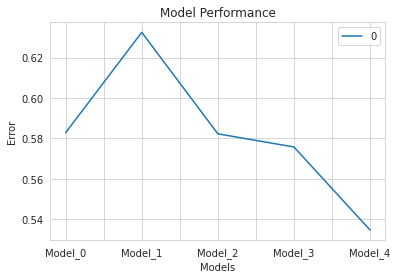

In [ ]:
pd.DataFrame(data=d.values(),index=d.keys()).plot()
plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Error')

Conclusion

* Model4:Tensorflow Hub Pre-Trained(Fine Tuning) has lowest of the error among all of the models.
* Model 4 is the most generative model

### Saving the Model

In [ ]:
tf.keras.models.save_model(model_3,filepath='/content/drive/MyDrive/data/feedback-prize-english-language-learning/finetunning.h5')

In [ ]:
### creating the function for prediction for single one

def answer(paragraph,model):
  preds = model.predict(pd.Series(paragraph));
  preds = np.array(preds)
  preds.reshape((6))
  print('cohesion:',float(preds[0]),
        '\nsyntax:',float(preds[1]),
        '\nvocabulary:',float(preds[2]),
        '\nphraseology:',float(preds[3]),
        '\ngrammar:',float(preds[4]),
        '\nconventions:',float(preds[5]))


In [ ]:
#sample prediction
answer("I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.")

1/1 [==============================] - 0s 23ms/step
cohesion: 2.757765054702759 
syntax: 2.791672945022583 
vocabulary: 2.7892611026763916 
phraseology: 2.768655776977539 
grammar: 2.758305549621582 
conventions: 2.8170037269592285


### Deployment

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 4.9 MB/s 
     |████████████████████████████████| 182 kB 80.4 MB/s 
     |████████████████████████████████| 237 kB 68.4 MB/s 
     |████████████████████████████████| 164 kB 76.4 MB/s 
     |████████████████████████████████| 4.7 MB 62.5 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=24c44ca17174b2f668bebcbc4c0e04043d6896a865c8a30e7a01475014330391
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
## writing streamlit  python file
%%writefile app.py
from sklearn import preprocessing 
import streamlit as st
import pandas as pd
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
import tensorflow_hub as hub 
import numpy as np


### creating the function for prediction for single one

def answer(paragraph,model):
  preds = model.predict(pd.Series(paragraph));
  preds = np.array(preds)
  preds.reshape((6))
  answer_dict={'cohesion':float(preds[0]),
        'syntax':float(preds[1]),
        'vocabulary':float(preds[2]),
        'phraseology':float(preds[3]),
        'grammar':float(preds[4]),
        'conventions':float(preds[5])}
  return answer_dict


filename = '/content/drive/MyDrive/data/feedback-prize-english-language-learning/finetunning.h5'
loaded_model = tf.keras.models.load_model(filename,custom_objects={'KerasLayer': hub.KerasLayer})
df = pd.read_csv('/content/drive/MyDrive/data/feedback-prize-english-language-learning/train.csv')
df = df['full_text']
st.set_option('deprecation.showPyplotGlobalUse', False)

st.markdown('<style>body{background-color: Blue;}</style>',unsafe_allow_html=True)
st.title("Prediction")

with st.form("my_form"):
    full_text=st.text_input(label='Enter the Text')
    data = full_text
    submitted = st.form_submit_button("Submit")

if submitted:
    a = answer(data,loaded_model)
    st.write(data)
    st.write('\nMarks obtained out of 5\n')
    st.write(pd.DataFrame(a))
    

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

npx: installed 22 in 4.641s


your url is: https://ripe-meals-ask-34-139-238-44.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.238.44:8501

  Stopping...
^C


In [1]:
## creating a function for prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub

filename = '/content/drive/MyDrive/data/feedback-prize-english-language-learning/finetunning.h5'
model = tf.keras.models.load_model(filename,custom_objects={'KerasLayer': hub.KerasLayer})
  



In [2]:
def answer(model=model):
  paragraph = input('Enter the Text\n\n')
  preds = model.predict(pd.Series(paragraph));
  preds = np.array(preds)
  preds.reshape((6))
  answer_dict={'Cohesion':float(preds[0]),
        'Syntax':float(preds[1]),
        'Vocabulary':float(preds[2]),
        'Phraseology':float(preds[3]),
        'Grammar':float(preds[4]),
        'Conventions':float(preds[5])}
  
  
  data = pd.DataFrame(answer_dict.values(),index=answer_dict.keys(),columns=['Score'])
  data['Description'] = ["Cohesion refers to the way we use vocabulary and grammatical structures to make connections between the ideas within a text",
                         "Syntax, the arrangement of words in sentences, clauses, and phrases, and the study of the formation of sentences and the relationship of their component parts",
                         "Vocabulary can be defined as the collection of words that are used by people for expressing written or verbal ideas",
                         "Phraseology as the way a speaker or writer puts words and phrases together to form sentences",
                         "Grammar is a system of rules that allow us to structure sentences",
                         "Conventions are broadly agreed upon rules of writing used to make writing clear to a general audience"]
  
  print('\n'*3)
  return data

In [10]:
data = answer()
data

Enter the Text

he is a good boy
1/1 [==============================] - 0s 19ms/step






,Score,Description
Cohesion,1.147259,Cohesion refers to the way we use vocabulary a...
Syntax,1.173591,"Syntax, the arrangement of words in sentences,..."
Vocabulary,1.105221,Vocabulary can be defined as the collection of...
Phraseology,1.080415,Phraseology as the way a speaker or writer put...
Grammar,1.156339,Grammar is a system of rules that allow us to ...
Conventions,1.129707,Conventions are broadly agreed upon rules of w...


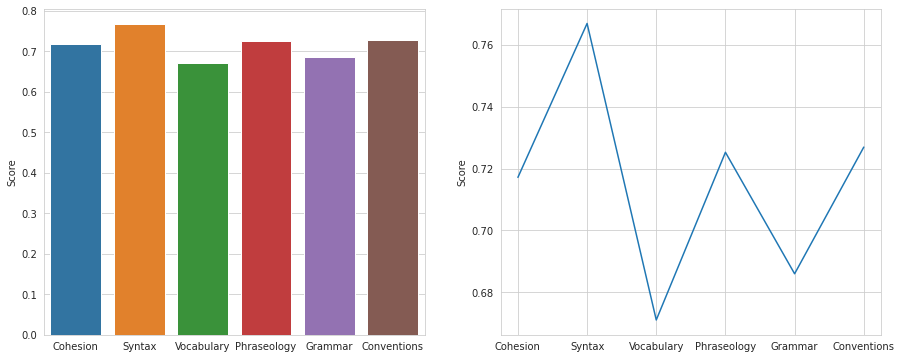

In [9]:
sns.set_style('whitegrid')
fig,[ax0,ax1] = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.barplot(x=data.index,y=data['Score'],ax=ax0)
sns.lineplot(x=data.index,y=data['Score'],ax=ax1)

plt.show()

In [ ]:
# multi output regression model  natural language processing 